In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("train.csv",names =["ID", "AP1", "AP2", "Ap3", "AP4", "Ap5", "AP6", "AP7", "RoomNo"])
X_test = pd.read_csv("test.csv", names =["ID", "AP1", "AP2", "Ap3", "AP4", "Ap5", "AP6", "AP7"] )
Id = X_test.iloc[:,0]
X_test.drop(['ID'], axis=1, inplace=True)
df.drop(['ID'], axis=1, inplace=True)

In [3]:
print("Train set: ",df.shape)
print("Test set: ",X_test.shape)

Train set:  (1500, 8)
Test set:  (500, 7)


In [4]:
df.head(5)

,AP1,AP2,Ap3,AP4,Ap5,AP6,AP7,RoomNo
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [5]:
df.describe()

,AP1,AP2,Ap3,AP4,Ap5,AP6,AP7,RoomNo
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
AP1       1500 non-null int64
AP2       1500 non-null int64
Ap3       1500 non-null int64
AP4       1500 non-null int64
Ap5       1500 non-null int64
AP6       1500 non-null int64
AP7       1500 non-null int64
RoomNo    1500 non-null int64
dtypes: int64(8)
memory usage: 93.8 KB


In [7]:
numeric_features = df.select_dtypes(include=[np.number])
print("Numeric_features : ",numeric_features.columns.size)
print("Numeric_features : ",numeric_features.columns)

Numeric_features :  8
Numeric_features :  Index(['AP1', 'AP2', 'Ap3', 'AP4', 'Ap5', 'AP6', 'AP7', 'RoomNo'], dtype='object')


In [8]:
#missing data in Training set
pd.set_option('precision', 6)
null_values_per_col =  df.isnull().sum().sort_values(ascending = False)
percent = ( df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

        Total  Percent
RoomNo      0      0.0
AP7         0      0.0
AP6         0      0.0
Ap5         0      0.0
AP4         0      0.0
Ap3         0      0.0
AP2         0      0.0
AP1         0      0.0


### Univariate

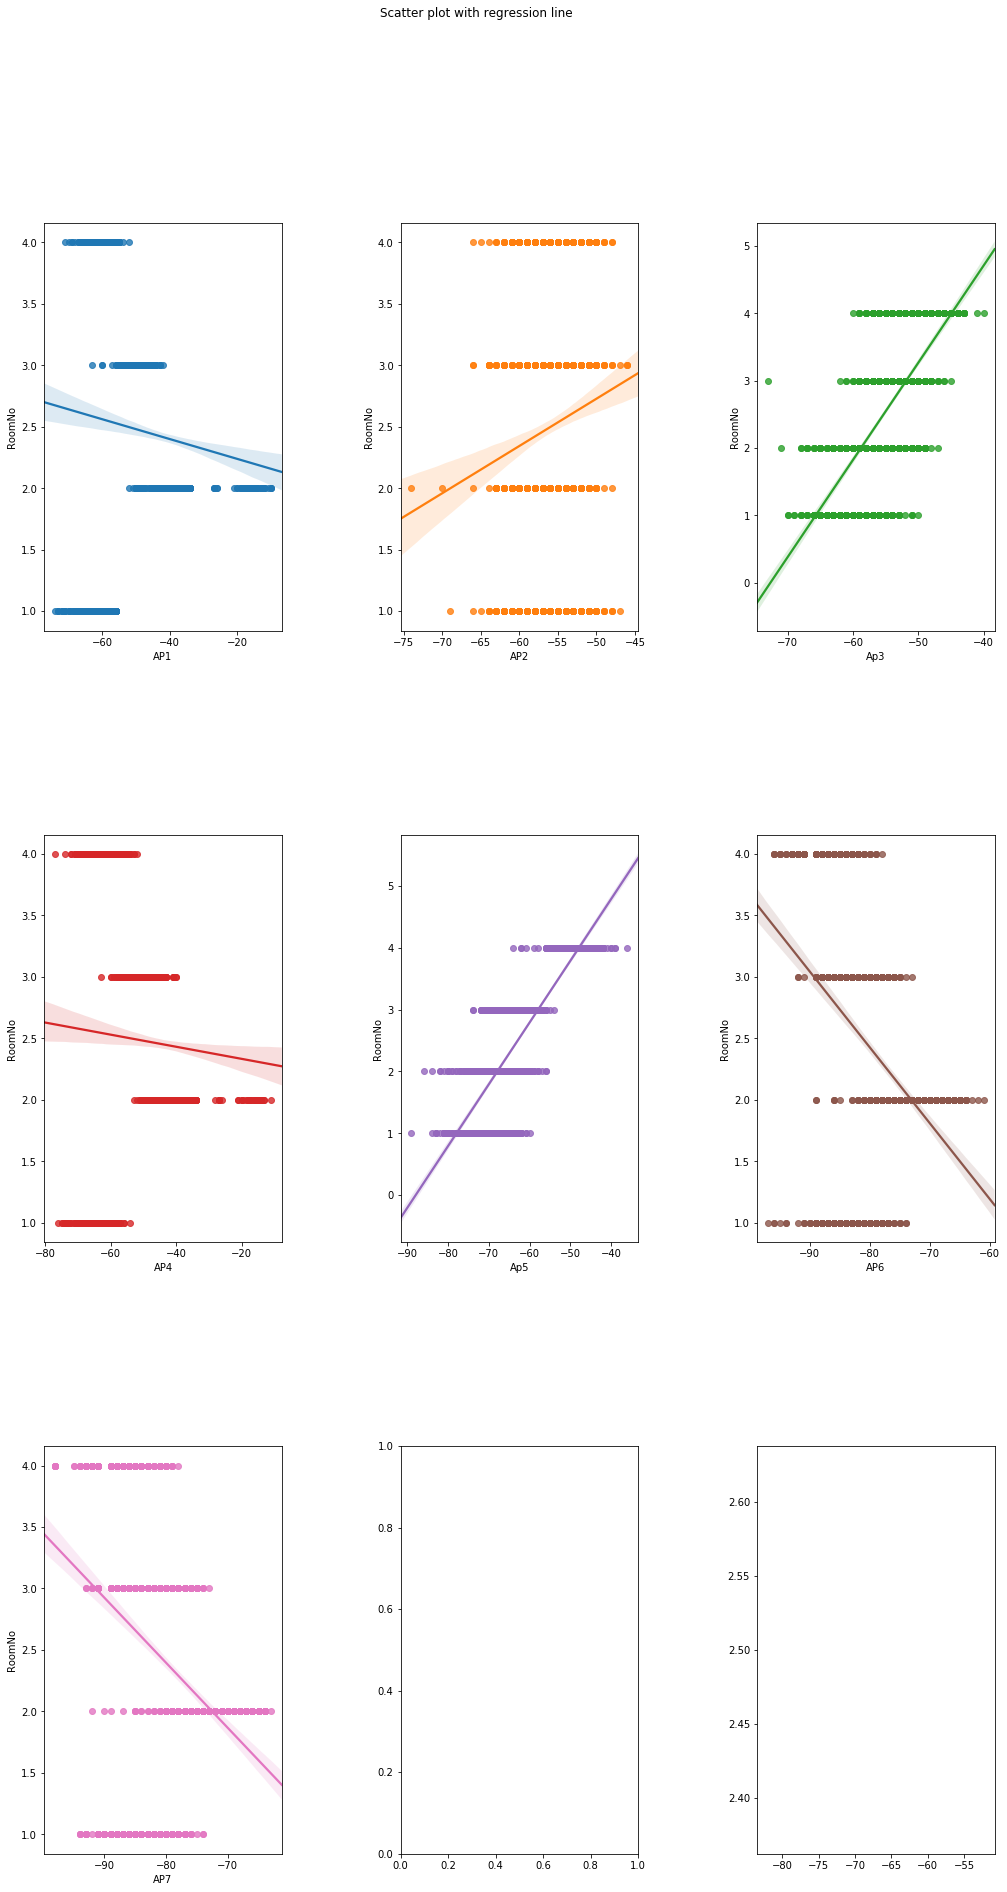

In [9]:
#Regression plot with individual numeric_feature
fig, axs = plt.subplots(3,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(numeric_features.drop([ "RoomNo"], axis = 1).columns):
        sns.regplot(numeric_features[col],df['RoomNo'], fit_reg = True, ax = axs[ind])
plt.suptitle('Scatter plot with regression line')
plt.show()


### Bivariate

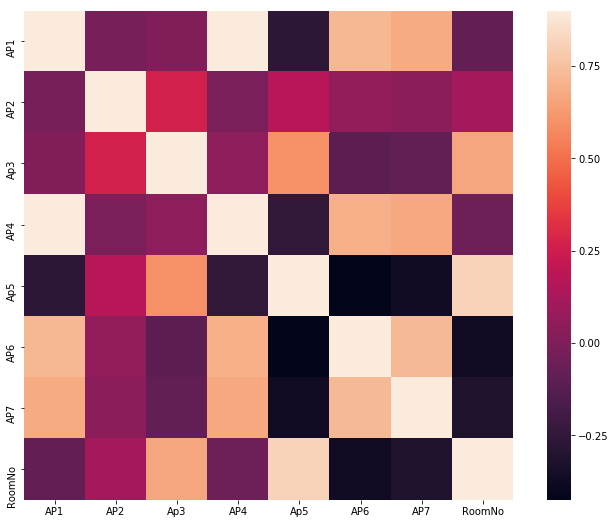

In [10]:
#Correlation map to see how features are correlated 
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [11]:
X, y = df.drop(["RoomNo"], axis = 1), df["RoomNo"]

In [12]:
cols = [ "AP1", "AP2", "Ap3", "AP4", "Ap5", "AP6", "AP7"]
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)

X = pd.DataFrame(X,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [13]:
X_test.shape

(500, 7)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 9)

In [15]:
X_train.shape, X_val.shape

((900, 7), (600, 7))

In [16]:
y_train.shape, y_val.shape

((900,), (600,))

# SVC

In [17]:
for c in [0.1, 10, 1000, 100000 ]:
    clf1 = SVC(C=c)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    print("C = ", c , " \t", acc)
    print(cm)

C =  0.1  	 0.9733333333333334
[[147   0   1   1]
 [  0 135   9   0]
 [  1   1 155   3]
 [  0   0   0 147]]
C =  10  	 0.9816666666666667
[[147   0   1   1]
 [  0 139   5   0]
 [  2   2 156   0]
 [  0   0   0 147]]
C =  1000  	 0.9833333333333333
[[147   0   1   1]
 [  0 142   2   0]
 [  2   3 155   0]
 [  0   0   1 146]]
C =  100000  	 0.9816666666666667
[[147   0   1   1]
 [  0 142   2   0]
 [  2   4 154   0]
 [  0   0   1 146]]


# Guassian Naive Bayes

In [18]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_val)
acc2 = accuracy_score(y_val, y_pred2)
print(acc2)
cm = confusion_matrix(y_val, y_pred)
print(cm)

0.99
[[147   0   1   1]
 [  0 142   2   0]
 [  2   4 154   0]
 [  0   0   1 146]]


# Decision Tree

In [19]:
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_val)
acc3 = accuracy_score(y_val, y_pred3)
cm = confusion_matrix(y_val, y_pred)
print(acc3)
print(cm)

0.9583333333333334
[[147   0   1   1]
 [  0 142   2   0]
 [  2   4 154   0]
 [  0   0   1 146]]


# KNN

In [20]:
clf4 = KNeighborsClassifier()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_val)
acc4 = accuracy_score(y_val, y_pred4)
cm = confusion_matrix(y_val, y_pred)
print(acc4)
print(cm)

0.9783333333333334
[[147   0   1   1]
 [  0 142   2   0]
 [  2   4 154   0]
 [  0   0   1 146]]


# Logistic regression

In [21]:

clf5 = LogisticRegression()
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_val)
acc5 = accuracy_score(y_val, y_pred5)
cm = confusion_matrix(y_val, y_pred)
print(acc5)
print(cm)

0.965
[[147   0   1   1]
 [  0 142   2   0]
 [  2   4 154   0]
 [  0   0   1 146]]


# Removing AP4 column

In [30]:
X_train.drop(['AP4'], axis=1, inplace=True)
X_val.drop(['AP4'], axis=1, inplace=True)

In [35]:
clf6 = GaussianNB()
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(X_val)
acc6 = accuracy_score(y_val, y_pred6)
print(acc6)
cm = confusion_matrix(y_val, y_pred6)
print(cm)

0.9733333333333334
[[145   0   4   0]
 [  0 136   8   0]
 [  2   0 157   1]
 [  0   0   1 146]]


# Final Model

In [39]:
X.drop(['AP4'], axis=1, inplace=True)
X_test.drop(['AP4'], axis=1, inplace=True)


In [40]:
clf = GaussianNB()
clf.fit(X, y)
pred = clf.predict(X_test)

In [41]:
Id.shape

(500,)

In [42]:
from collections import OrderedDict
ans = OrderedDict([('Id', Id), ('Room',pred)])
submission = pd.DataFrame(ans)

In [43]:
submission.head(10)

,Id,Room
0,ID_1,1
1,ID_2,4
2,ID_3,4
3,ID_4,2
4,ID_5,1
5,ID_6,3
6,ID_7,1
7,ID_8,4
8,ID_9,2
9,ID_10,2


In [45]:
submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q1\submissionWithoutAP4.csv', index=False)